In [1]:
import lstm
import time
import poloniex
from numpy import newaxis
import pandas as pd
import numpy as np
from matplotlib.pylab import rcParams
import seaborn as sns

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt

In [3]:
epoch = 1
seq_len = 50
filename = "USDT_BTC.csv"

In [4]:
polo = poloniex.Poloniex()
chart_data = polo.returnChartData('USDT_BTC',period=7200,start=time.time() - polo.DAY * 365 * 3, end=time.time())

In [5]:
df = pd.DataFrame(chart_data)
df.to_csv(path_or_buf=filename, header = False, index= False)

In [6]:
X_train, y_train, X_test, y_test = lstm.load_data(filename,seq_len, True)

In [14]:
y_train

array([ 0.06158664,  0.00782291,  0.0705474 , ...,  0.04686522,
       -0.0196686 , -0.19139974])

In [7]:
model = lstm.build_model([1, 50, 100, 1])

 実行時間：　 0.013033866882324219


In [8]:
model.fit(X_train,y_train,batch_size=512,nb_epoch=epoch,validation_split=0.05)

Train on 11191 samples, validate on 590 samples
Epoch 1/1
11191/11191 [==============================] - 9s 846us/step - loss: 0.0026 - val_loss: 7.9381e-04


In [10]:
predictions = lstm.predict_sequences_multiple(model,X_test,seq_len,50)

In [16]:
X_test

array([[[ 0.00000000e+00],
        [ 8.83957209e-03],
        [ 1.30007379e-02],
        ...,
        [-4.17839683e-03],
        [ 4.36822725e-05],
        [ 6.83496461e-03]],

       [[ 0.00000000e+00],
        [ 4.12470516e-03],
        [-3.02620427e-03],
        ...,
        [-8.71881919e-03],
        [-1.98704287e-03],
        [-6.93726937e-03]],

       [[ 0.00000000e+00],
        [-7.12153519e-03],
        [-4.84273767e-03],
        ...,
        [-6.08664242e-03],
        [-1.10165346e-02],
        [-2.34381988e-03]],

       ...,

       [[ 0.00000000e+00],
        [ 2.57917645e-03],
        [ 1.83095033e-03],
        ...,
        [ 5.44748641e-02],
        [ 5.71951287e-02],
        [ 6.49273598e-02]],

       [[ 0.00000000e+00],
        [-7.46301273e-04],
        [-4.36015786e-03],
        ...,
        [ 5.44754504e-02],
        [ 6.21877900e-02],
        [ 6.47132574e-02]],

       [[ 0.00000000e+00],
        [-3.61655563e-03],
        [-3.89925322e-04],
        ...,
        

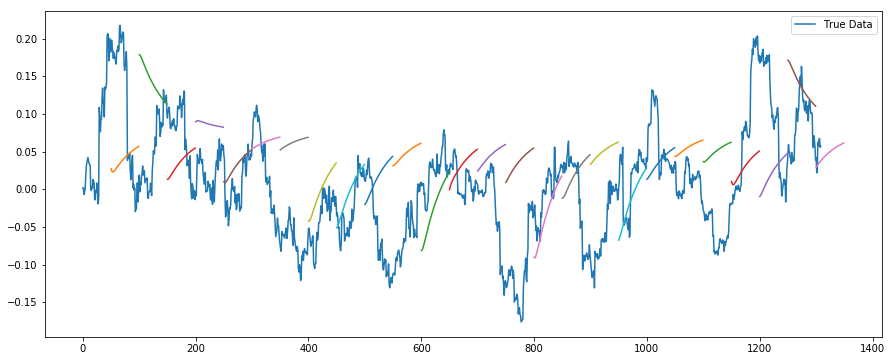

In [17]:
fig = plt.figure(facecolor="white")
ax  = fig.add_subplot(111)
ax.plot(y_test, label='True Data')

for i , data in enumerate(predictions):
    padding = [None for p in range((i + 1) * 50)]
    plt.plot(padding + data)
    plt.legend()
rcParams['figure.figsize'] = 15,6
plt.show()

#plot_results_multiple(predictions, y_test, 50)